In [1]:
using DifferentialEquations, Plots


function R(x)
    x / (1 + x)
end

# represents derivatives du, functions u, model parameters p, and time t
function love_model(du, u, p, t) 
     A_1, A_2, alpha, rho, K = p
     du[1] = - alpha * u[1] + rho * A_2 + K * R(u[2])
     du[2] = - alpha * u[2] + rho * A_1 + K * R(u[1])
end

love_model (generic function with 1 method)

In [6]:
model_parameters = [1.2, 1., 1., 1., 15.]
initial_vals = [0, 0.]
tspan = (0., 50.)


prob = ODEProblem(love_model, initial_vals, tspan, model_parameters)
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 33-element Vector{Float64}:
  0.0
  8.924109365000567e-5
  0.0009816520301500623
  0.008074660741121661
  0.0261222953881726
  0.05603608413031466
  0.09886668967314177
  0.16132186702521178
  0.25235055984507215
  0.3889688357404944
  0.6033939664303469
  0.9487552281024707
  1.3465649046291683
  ⋮
 11.152059735097389
 13.772184757396692
 17.231539370868433
 21.717494819179294
 26.666877971391592
 31.29218313632989
 35.35643066589919
 38.980460560263744
 42.32791872303956
 45.514973667018545
 48.64970924342596
 50.0
u: 33-element Vector{Vector{Float64}}:
 [2.0, 0.0]
 [1.9999114313738025, 0.000999449048727486]
 [1.9990991309007229, 0.010988349322176712]
 [1.9970970892157633, 0.09004136088645143]
 [2.0215764736296715, 0.2889360527311586]
 [2.127921901866897, 0.6138143851790003]
 [2.3669895767719713, 1.0732056562897374]
 [2.8129196354861272, 1.73544029

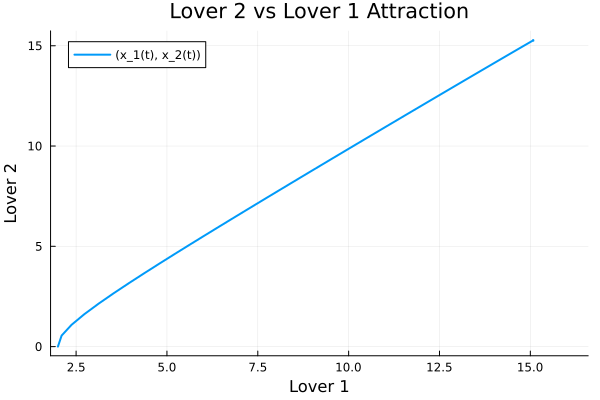

In [7]:
plot(sol, idxs=(1, 2), linewidth=2, title ="Lover 2 vs Lover 1 Attraction",
    xaxis = "Lover 1", yaxis = "Lover 2", label="(x_1(t), x_2(t))"
)

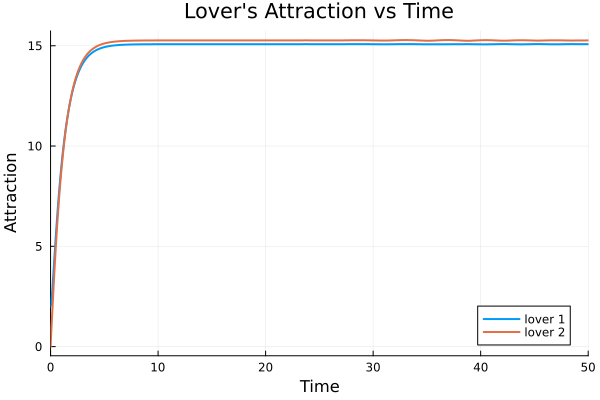

In [8]:
plot(sol, linewidth=2, title ="Lover's Attraction vs Time", xaxis = "Time", 
    yaxis = "Attraction", label=["lover 1" "lover 2"]
)

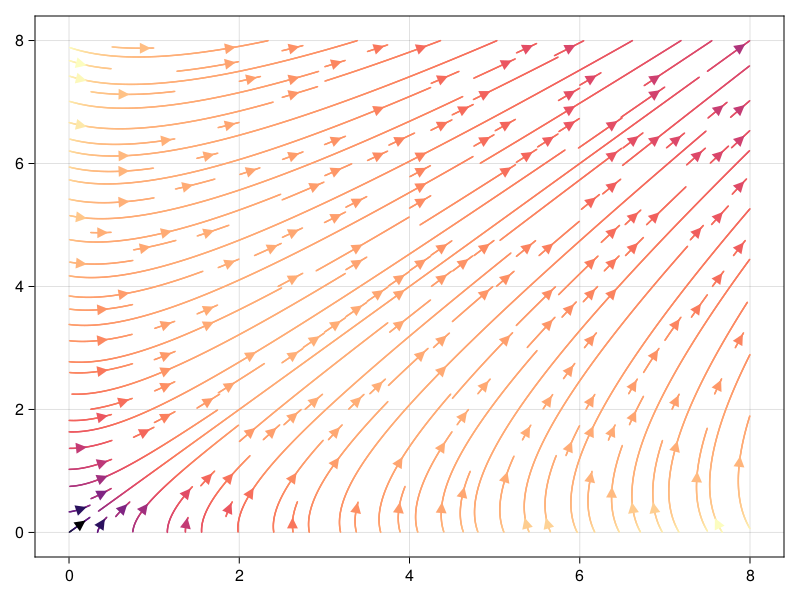

In [11]:
using CairoMakie


struct LoveModelParams{T}
    A_1::T
    A_2::T
    alpha::T
    rho::T
    K::T
end

P = LoveModelParams(1., 1., 1., 1., 15.)

f(u, P::LoveModelParams) = Point2f(
    - P.alpha * u[1] + P.rho * P.A_2 + P.K * R(u[2]),
    - P.alpha * u[2] + P.rho * P.A_1 + P.K * R(u[1])
)

f(x) = f(x, P)

streamplot(f, 0..8., 0..8., colormap=:magma)